In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, metrics
from sklearn.svm import SVC,LinearSVC 
from sklearn.model_selection import KFold,StratifiedKFold
from sklearn.metrics import matthews_corrcoef,auc, roc_curve,classification_report, confusion_matrix,average_precision_score, precision_recall_curve
from pandas.core.frame import DataFrame
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
import imblearn
from collections import Counter
from sklearn.pipeline import make_pipeline
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import PrecisionRecallDisplay







In [2]:
#Load data from csv file
phenodata = pd.read_csv('PhenoData.csv')
phenodata.shape



(1936, 2)

In [3]:
phenodata.head(5)

,prename,CIP
0,ERR434268,S
1,ERR434269,R
2,ERR434270,S
3,ERR434271,R
4,ERR434272,S


In [4]:
#Load genotype data
genodata = pd.read_csv('genodata.csv')

genodata.shape

/var/folders/pz/r7wc470j1bd46gyqhmtts0p80000gn/T/ipykernel_25611/1668986545.py:3: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251

(1530, 30530)

In [5]:
genodata.head(5)

,prename,900,966,2532,3025,3079,4355,4363,4442,4651,...,4639005,4639303,4639512,4640538,4640785,4640908,4641217,4641296,4641439,4641440
0,ERR434259,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,C,NaN,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ERR434260,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,C,NaN,A,T,NaN,NaN,NaN,NaN,NaN,NaN
2,ERR434261,T,NaN,NaN,NaN,C,NaN,NaN,NaN,NaN,...,C,NaN,A,T,NaN,NaN,NaN,NaN,NaN,NaN
3,ERR434262,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,C,NaN,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ERR434264,T,NaN,NaN,NaN,C,NaN,NaN,NaN,NaN,...,C,NaN,A,T,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#Create a new dataframe and encode A,G,C,T to 1,2,3,4 and also the NaN values to 0
genodata1 = genodata.copy()
genodata1 = genodata1.replace('A',1)
genodata1 = genodata1.replace('G',2)
genodata1 = genodata1.replace('C',3)
genodata1 = genodata1.replace('T',4)
genodata1 = genodata1.replace(np.nan,0)

genodata1.head(5)

,prename,900,966,2532,3025,3079,4355,4363,4442,4651,...,4639005,4639303,4639512,4640538,4640785,4640908,4641217,4641296,4641439,4641440
0,ERR434259,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ERR434260,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,0.0,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ERR434261,4.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,3.0,0.0,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ERR434262,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ERR434264,4.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,3.0,0.0,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
#merge phenotype and genotype data by prename
data = pd.merge(phenodata, genodata1, on='prename')


In [8]:
data.head(5)

,prename,CIP,900,966,2532,3025,3079,4355,4363,4442,...,4639005,4639303,4639512,4640538,4640785,4640908,4641217,4641296,4641439,4641440
0,ERR434268,S,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ERR434269,R,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ERR434270,S,4.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,...,3.0,0.0,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ERR434271,R,4.0,0.0,0.0,2.0,0.0,3.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ERR434272,S,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
#Count number of categories in the data for row CIP
data['CIP'].value_counts()

CIP
S    1228
R     266
I      12
Name: count, dtype: int64

In [10]:
#Delete row where CIP is equal to I
data = data[data.CIP != 'I']

In [11]:
data['CIP'].value_counts()

CIP
S    1228
R     266
Name: count, dtype: int64

In [12]:
#Data shape
data.shape

(1495, 30531)

In [ ]:
#### Load the independent dataset for nigeria
africaphenodata = pd.read_csv('phenotypes/all_CIP.csv')
africagenodata = pd.read_csv('ng.csv')

In [14]:
africaphenodata.shape

(182, 2)

In [15]:
africagenodata.shape

(179, 29100)

In [16]:
#merge phenotype and genotype data by prename
africadata = pd.merge(africaphenodata, africagenodata, on='prename')
africadata.head(3)


,prename,CIP,393,559,588,621,747,759,774,867,...,4640924,4641031,4641131,4641208,4641217,4641296,4641439,4641440,4641483,4641488
0,ERR4783056,R,2,3,1,3,2,4,3,0,...,2,1,3,4,1,3,3,1,0,0
1,ERR4783037,R,2,3,1,3,2,4,3,0,...,2,1,3,4,1,3,3,1,0,0
2,ERR4783076,R,2,3,1,3,2,4,3,0,...,0,2,3,4,1,3,3,1,0,0


In [17]:
africadata['CIP'].value_counts()

CIP
S    92
R    82
I     3
Name: count, dtype: int64

In [18]:
#Delete row where CIP is equal to I
africadata = africadata[africadata.CIP != 'I']

In [19]:
africadata['CIP'].value_counts()

CIP
S    92
R    82
Name: count, dtype: int64

In [20]:
#Remove relevant columns/features for both datasets
data = data.drop(['prename'], axis=1)
africadata = africadata.drop(['prename'], axis=1)


In [21]:
data['CIP'] = data['CIP'].map({'S': 0, 'R': 1})
africadata['CIP'] = africadata['CIP'].map({'S': 0, 'R': 1})


In [22]:
#Drop the rows with missing values
data = data.dropna()
africadata = africadata.dropna()


In [23]:
# Find common columns
common_cols = data.columns.intersection(africadata.columns)
X = data[common_cols]
Africa_X = africadata[common_cols]

In [24]:
y = X['CIP']
Africa_y = Africa_X['CIP']


In [25]:
X = X.drop(['CIP'], axis=1)
Africa_X = Africa_X.drop(['CIP'], axis=1)

In [24]:
#Convert X to int64
X = X.astype('int64')
y = y.astype('int64')

In [26]:
#Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [27]:
y_train.value_counts()

CIP
0.0    983
1.0    212
Name: count, dtype: int64

### Downsampling step

In [28]:
def downsample_data(X_train, y_train, random_state=42):
    # Combine the features and target into a single DataFrame for easy sampling
    df_train = pd.concat([X_train, y_train], axis=1)
    
    # Separate majority and minority classes in the training set
    df_majority = df_train[df_train.CIP==0]
    df_minority = df_train[df_train.CIP==1]
    
    # Downsample the majority class
    df_majority_downsampled = df_majority.sample(len(df_minority), replace=False, random_state=random_state)
    
    # Combine the downsampled majority class with the minority class
    df_downsampled = pd.concat([df_majority_downsampled, df_minority])
    
    # Shuffle the dataset to prevent the model from learning any order
    df_downsampled = df_downsampled.sample(frac=1, random_state=random_state).reset_index(drop=True)
    
    # Separate the features and target
    X_downsampled = df_downsampled.drop('CIP', axis=1)
    y_downsampled = df_downsampled['CIP']
    
    return X_downsampled, y_downsampled




In [29]:
# Apply the downsampling function to the training data only
X_train_downsampled, y_train_downsampled = downsample_data(X_train, y_train)

# Check the balance after downsampling
print("Class distribution after downsampling in the training set:")
print(y_train_downsampled.value_counts())

Class distribution after downsampling in the training set:
CIP
0.0    212
1.0    212
Name: count, dtype: int64


In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

def create_keras_model():
    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=10000),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(C=9.795846277645586, gamma='auto', kernel='sigmoid', probability=True),  # Updated parameters
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(),
    'LightGBM': LGBMClassifier(),
    'CatBoost': CatBoostClassifier(verbose=False),
    'Feed-Forward NN (Keras)': KerasClassifier(build_fn=create_keras_model, epochs=20, batch_size=32, verbose=0)
}


/var/folders/pz/r7wc470j1bd46gyqhmtts0p80000gn/T/ipykernel_25611/3522831632.py:29: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  'Feed-Forward NN (Keras)': KerasClassifier(build_fn=create_keras_model, epochs=20, batch_size=32, verbose=0)


## Hyperparameter tuning

### Define Parameter Grids for each classifier

In [155]:
#import numpy as np
#from scipy.stats import randint as sp_randint
#from scipy.stats import uniform
#from sklearn.model_selection import RandomizedSearchCV
#from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
#from sklearn.linear_model import LogisticRegression
#from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
#from sklearn.svm import SVC
#from xgboost import XGBClassifier
#from lightgbm import LGBMClassifier
#from catboost import CatBoostClassifier
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense
#from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

# Define parameter grids for each classifier
#param_dist = {
 #   'Logistic Regression': {
  #      'C': uniform(0.1, 10),
   #     'penalty': ['l2']
    #},
    #'Random Forest': {
     #   'n_estimators': sp_randint(100, 500),
      #  'max_features': ['auto', 'sqrt', 'log2'],
       # 'max_depth': sp_randint(3, 20),
      #  'min_samples_split': sp_randint(2, 11),
       # 'min_samples_leaf': sp_randint(1, 11),
       # 'bootstrap': [True, False]
    #},
    #'SVM': {
     #   'C': uniform(0.1, 10),
      #  'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
       # 'gamma': ['scale', 'auto']
   # },
    #'Gradient Boosting': {
     #   'n_estimators': sp_randint(100, 500),
      #  'learning_rate': uniform(0.01, 0.3),
       # 'subsample': uniform(0.5, 0.5),
       # 'max_depth': sp_randint(3, 10)
    #},
    #'XGBoost': {
     #   'n_estimators': sp_randint(100, 500),
      #  'learning_rate': uniform(0.01, 0.3),
       # 'subsample': uniform(0.5, 0.5),
       # 'max_depth': sp_randint(3, 10),
       # 'colsample_bytree': uniform(0.5, 0.5)
    #},
    #'LightGBM': {
     #   'n_estimators': sp_randint(100, 500),
      #  'learning_rate': uniform(0.01, 0.3),
       # 'num_leaves': sp_randint(20, 50),
        #'boosting_type': ['gbdt', 'dart', 'goss'],
       # 'subsample': uniform(0.5, 0.5)
    #},
    #'CatBoost': {
     #   'iterations': sp_randint(100, 500),
      #  'learning_rate': uniform(0.01, 0.3),
       # 'depth': sp_randint(4, 10)
    #},
    # Keras classifier hyperparameter grid
    #'Feed-Forward NN (Keras)': {
     #   'epochs': [10, 50, 100],
      #  'batch_size': [16, 32, 64],
       # 'optimizer': ['adam', 'sgd']
   # }
#}

# Function to create Keras model
#def create_keras_model(optimizer='adam', input_dim=None):
 #   model = Sequential()
  #  model.add(Dense(64, input_dim=input_dim, activation='relu'))
   # model.add(Dense(32, activation='relu'))
   # model.add(Dense(1, activation='sigmoid'))
   # model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
   # return model

# Initialize classifiers
#classifiers = {
 #   'Logistic Regression': LogisticRegression(max_iter=10000),
  #  'Random Forest': RandomForestClassifier(),
   # 'SVM': SVC(probability=True),
   # 'Gradient Boosting': GradientBoostingClassifier(),
   # 'XGBoost': XGBClassifier(),
   # 'LightGBM': LGBMClassifier(),
   # 'CatBoost': CatBoostClassifier(verbose=False),
   # 'Feed-Forward NN (Keras)': KerasClassifier(build_fn=create_keras_model, verbose=0)
#}





/var/folders/pz/r7wc470j1bd46gyqhmtts0p80000gn/T/ipykernel_88262/3237172678.py:86: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  'Feed-Forward NN (Keras)': KerasClassifier(build_fn=create_keras_model, verbose=0)


### Perform Randomised Search CV

In [221]:
"""
best_params = {}  # Initialize an empty dictionary to store best parameters

for name, clf in classifiers.items():
    if name == 'Feed-Forward NN (Keras)':
        random_search = RandomizedSearchCV(KerasClassifier(build_fn=create_keras_model), param_dist[name], n_iter=30, cv=3, verbose=1)
    else:
        random_search = RandomizedSearchCV(clf, param_dist[name], n_iter=30, cv=3, verbose=1, n_jobs=-1, random_state=42)
    
    random_search.fit(X_train, y_train)
    
     Update the best_params dictionary with best parameters for each model
    best_params[name] = random_search.best_params_
    
     Update the classifier with the best parameters
    if name == 'Feed-Forward NN (Keras)':
        classifiers[name] = KerasClassifier(build_fn=lambda: create_keras_model(**best_params[name]), verbose=0)
    else:
        classifiers[name].set_params(**best_params[name])

# Now, best_params contains the best parameters for each model
"""

"\nbest_params = {}  # Initialize an empty dictionary to store best parameters\n\nfor name, clf in classifiers.items():\n    if name == 'Feed-Forward NN (Keras)':\n        random_search = RandomizedSearchCV(KerasClassifier(build_fn=create_keras_model), param_dist[name], n_iter=30, cv=3, verbose=1)\n    else:\n        random_search = RandomizedSearchCV(clf, param_dist[name], n_iter=30, cv=3, verbose=1, n_jobs=-1, random_state=42)\n    \n    random_search.fit(X_train, y_train)\n    \n     Update the best_params dictionary with best parameters for each model\n    best_params[name] = random_search.best_params_\n    \n     Update the classifier with the best parameters\n    if name == 'Feed-Forward NN (Keras)':\n        classifiers[name] = KerasClassifier(build_fn=lambda: create_keras_model(**best_params[name]), verbose=0)\n    else:\n        classifiers[name].set_params(**best_params[name])\n\n# Now, best_params contains the best parameters for each model\n"

In [79]:
# Saving the best_params dictionary

# Using JSON
#import json
#with open('best_hyperparameters.json', 'w') as f:
    #json.dump(best_params, f)

In [156]:
"""
# Loading the best parameters from JSON file for future use
import json
with open('best_hyperparameters.json', 'r') as f:
    best_params = json.load(f)

#Update classifiers with loaded parameters
for name, params in best_params.items():
    if name == 'Feed-Forward NN (Keras)':
        # Extract 'epochs' and 'batch_size' as they are not part of model building
        epochs = params.pop('epochs', 20)
        batch_size = params.pop('batch_size', 32)
        # Now create the KerasClassifier with the correct parameters
        classifiers[name] = KerasClassifier(build_fn=lambda: create_keras_model(input_dim=X_train.shape[1], **params), epochs=epochs, batch_size=batch_size, verbose=0)
    else:
        classifiers[name].set_params(**params)


"""

/var/folders/pz/r7wc470j1bd46gyqhmtts0p80000gn/T/ipykernel_88262/3976325622.py:13: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  classifiers[name] = KerasClassifier(build_fn=lambda: create_keras_model(input_dim=X_train.shape[1], **params), epochs=epochs, batch_size=batch_size, verbose=0)


### Evaluate Models

In [31]:
# Function to evaluate models
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def evaluate_models(classifiers, X_train, y_train, X_test, y_test):

    results = {}
    for name, clf in classifiers.items():
        clf.fit(X_train, y_train)
        y_pred_test = clf.predict(X_test)
        y_pred_proba_test = clf.predict_proba(X_test)[:, 1] if hasattr(clf, "predict_proba") else [0]*len(y_test)
        
        accuracy = accuracy_score(y_test, y_pred_test)
        precision = precision_score(y_test, y_pred_test)
        recall = recall_score(y_test, y_pred_test)
        f1 = f1_score(y_test, y_pred_test)
        auc_roc = roc_auc_score(y_test, y_pred_proba_test)
        
        results[name] = {
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1_score': f1,
            'auc_roc': auc_roc
        }
    return results



In [32]:
def train_models(classifiers, X_train, y_train):
    trained_classifiers = {}
    for name, clf in classifiers.items():
        if name == 'Feed-Forward NN (Keras)':
            model = clf.build_fn()  # Build the Keras model
            model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=0)
            trained_classifiers[name] = model
        else:
            trained_classifiers[name] = clf.fit(X_train, y_train)
    return trained_classifiers


In [33]:
def evaluate_models(classifiers, X_test, y_test):
    results = {}
    for name, clf in classifiers.items():
        if name == 'Feed-Forward NN (Keras)':
            y_pred_test = (clf.predict(X_test) > 0.5).astype("int32").reshape(-1)
            y_pred_proba_test = clf.predict(X_test).reshape(-1)
        else:
            y_pred_test = clf.predict(X_test)
            y_pred_proba_test = clf.predict_proba(X_test)[:, 1] if hasattr(clf, "predict_proba") else [0]*len(y_test)

        accuracy = accuracy_score(y_test, y_pred_test)
        precision = precision_score(y_test, y_pred_test)
        recall = recall_score(y_test, y_pred_test)
        f1 = f1_score(y_test, y_pred_test)
        auc_roc = roc_auc_score(y_test, y_pred_proba_test)

        results[name] = {
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1_score': f1,
            'auc_roc': auc_roc
        }
    return results


In [34]:
# Train models on the original dataset
classifiers_trained_on_original = train_models(classifiers, X_train, y_train)

# Evaluate on the original test dataset
results_original = evaluate_models(classifiers_trained_on_original, X_test, y_test)




/Users/mikensubuga/opt/miniconda3/envs/mlamr39/lib/python3.9/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/mikensubuga/opt/miniconda3/envs/mlamr39/lib/python3.9/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/Users/mikensubuga/opt/miniconda3/envs/mlamr39/lib/python3.9/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/Users/mikensubuga/opt/miniconda3/envs/mlamr39/lib/python3.9/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. U

[LightGBM] [Info] Number of positive: 212, number of negative: 983
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.328818 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 21472
[LightGBM] [Info] Number of data points in the train set: 1195, number of used features: 10174
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.177406 -> initscore=-1.534023
[LightGBM] [Info] Start training from score -1.534023


2024-03-13 11:14:41.607117: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
/Users/mikensubuga/opt/miniconda3/envs/mlamr39/lib/python3.9/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/mikensubuga/opt/miniconda3/envs/mlamr39/lib/python3.9/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/Users/mikensubuga/opt/miniconda3/envs/mlamr39/lib/python3.9/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/Users/mikensubuga/opt/miniconda3/envs/mlamr39/lib/python3.9/site-pa

10/10 [==============================] - 0s 928us/step


In [35]:
# Train models on the downsampled dataset
classifiers_trained_on_downsampled = train_models(classifiers, X_train_downsampled, y_train_downsampled)

# Evaluate on the downsampled test dataset
results_downsampled = evaluate_models(classifiers_trained_on_downsampled, X_test, y_test)

/Users/mikensubuga/opt/miniconda3/envs/mlamr39/lib/python3.9/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/mikensubuga/opt/miniconda3/envs/mlamr39/lib/python3.9/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/Users/mikensubuga/opt/miniconda3/envs/mlamr39/lib/python3.9/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/Users/mikensubuga/opt/miniconda3/envs/mlamr39/lib/python3.9/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. U

[LightGBM] [Info] Number of positive: 212, number of negative: 212
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.741325 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 21231
[LightGBM] [Info] Number of data points in the train set: 424, number of used features: 10174
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

/Users/mikensubuga/opt/miniconda3/envs/mlamr39/lib/python3.9/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/mikensubuga/opt/miniconda3/envs/mlamr39/lib/python3.9/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/Users/mikensubuga/opt/miniconda3/envs/mlamr39/lib/python3.9/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/Users/mikensubuga/opt/miniconda3/envs/mlamr39/lib/python3.9/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. U

10/10 [==============================] - 0s 798us/step


In [36]:
df_original = pd.DataFrame(results_original).transpose().round(2)
df_original

,accuracy,precision,recall,f1_score,auc_roc
Logistic Regression,0.85,0.60,0.48,0.54,0.83
Random Forest,0.83,0.53,0.31,0.40,0.73
SVM,0.87,0.68,0.50,0.57,0.86
Gradient Boosting,0.85,0.68,0.31,0.43,0.84
XGBoost,0.85,0.63,0.41,0.49,0.82
LightGBM,0.85,0.61,0.43,0.50,0.84
CatBoost,0.87,0.81,0.39,0.52,0.84
Feed-Forward NN (Keras),0.84,0.55,0.52,0.53,0.78


In [37]:
df_downsampled = pd.DataFrame(results_downsampled).transpose().round(2)
df_downsampled

,accuracy,precision,recall,f1_score,auc_roc
Logistic Regression,0.70,0.34,0.69,0.45,0.81
Random Forest,0.65,0.27,0.56,0.37,0.67
SVM,0.75,0.39,0.69,0.50,0.80
Gradient Boosting,0.74,0.38,0.74,0.51,0.84
XGBoost,0.73,0.37,0.69,0.48,0.82
LightGBM,0.70,0.34,0.70,0.46,0.81
CatBoost,0.73,0.38,0.72,0.49,0.82
Feed-Forward NN (Keras),0.66,0.29,0.63,0.40,0.70


In [ ]:
"""""
import matplotlib.pyplot as plt
import seaborn as sns

def plot_metrics(results):
    metrics = ['accuracy', 'precision', 'recall', 'f1_score', 'auc_roc']
    
    for metric in metrics:
        plt.figure(figsize=(10, 5))
        sns.barplot(x=list(results.keys()), y=[res[metric] for res in results.values()])
        plt.title(f'{metric.capitalize()} for Different Models for balanced CIP')
        plt.xticks(rotation=45)
        plt.ylabel(metric)
        plt.show()

"""""

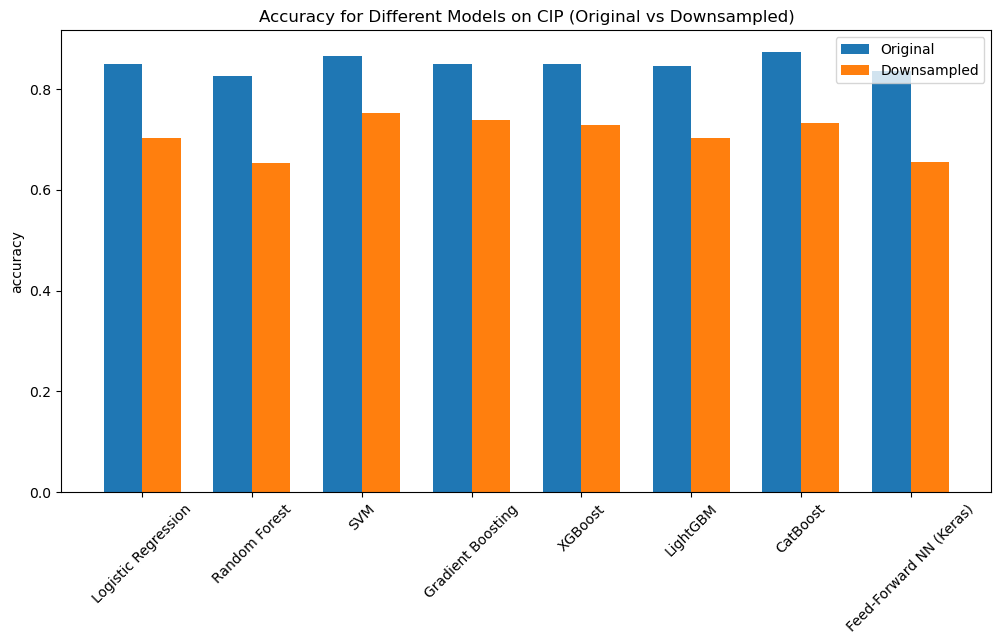

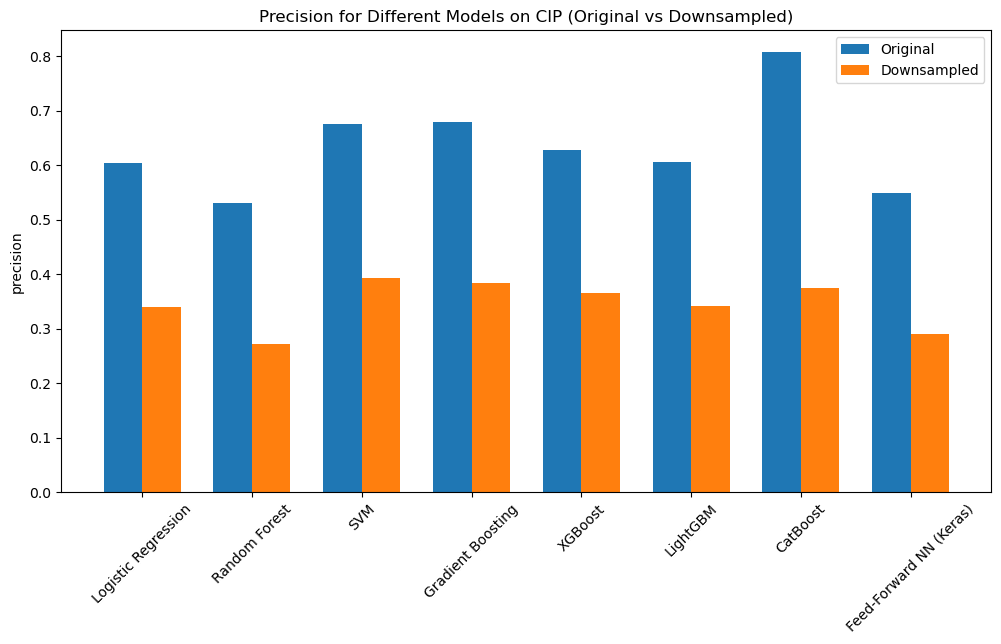

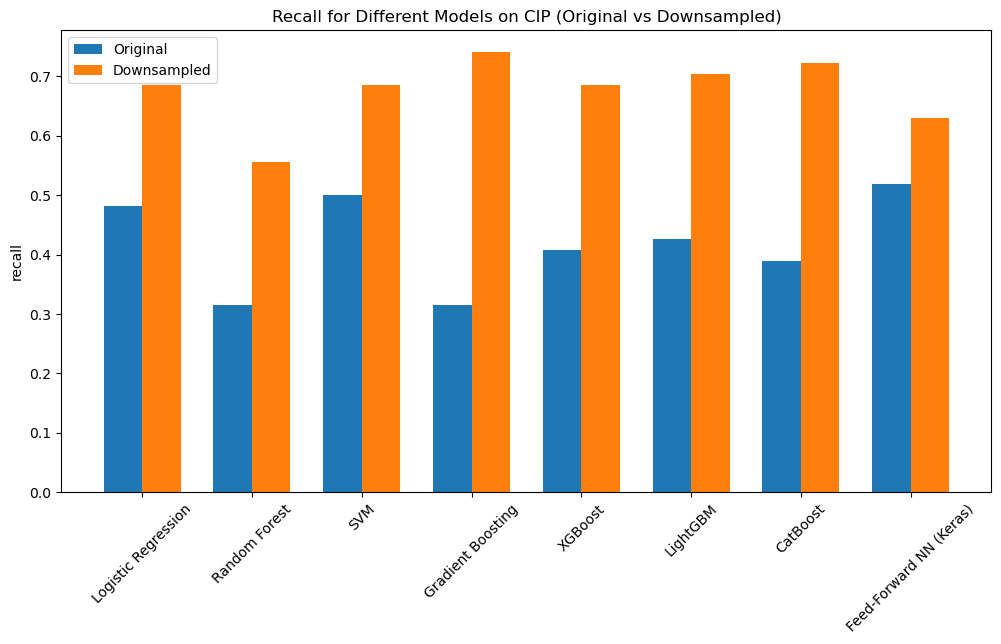

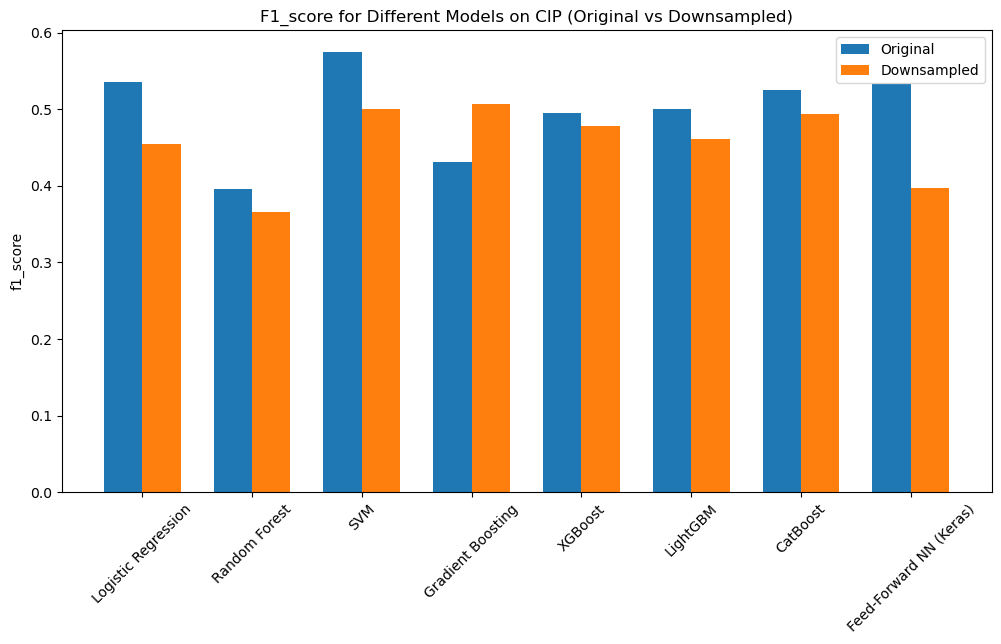

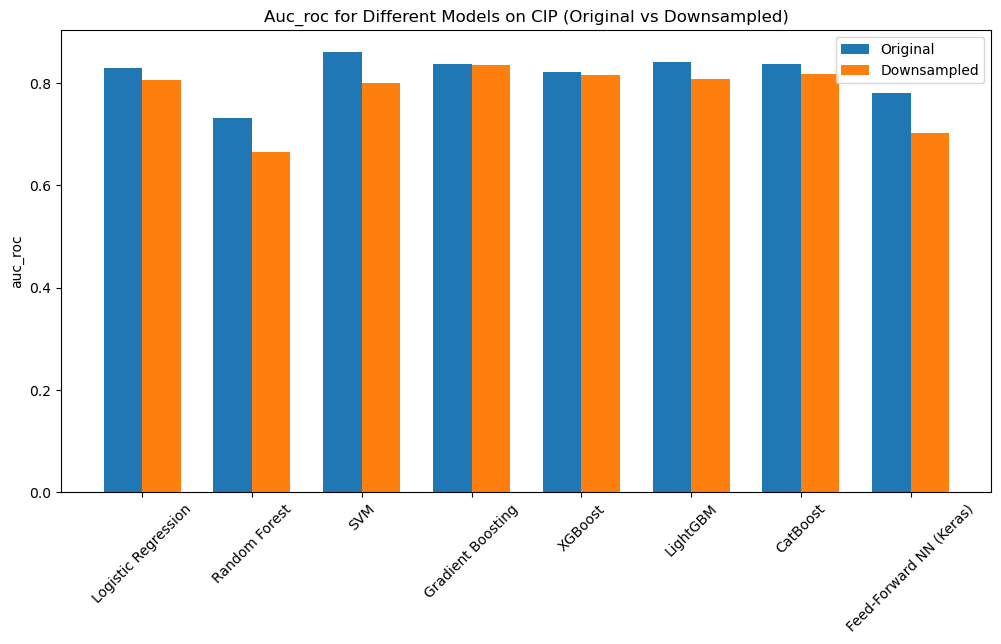

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_both_metrics(results_original, results_downsampled):
    metrics = ['accuracy', 'precision', 'recall', 'f1_score', 'auc_roc']
    
    for metric in metrics:
        plt.figure(figsize=(12, 6))

        # Extracting metric values
        original_metrics = [res[metric] for res in results_original.values()]
        downsampled_metrics = [res[metric] for res in results_downsampled.values()]
        labels = list(results_original.keys())

        # Creating positions for the bars
        x = range(len(labels))
        width = 0.35

        # Plotting the bars
        plt.bar([p - width/2 for p in x], original_metrics, width=width, label='Original')
        plt.bar([p + width/2 for p in x], downsampled_metrics, width=width, label='Downsampled')

        # Adding chart details
        plt.title(f'{metric.capitalize()} for Different Models on CIP (Original vs Downsampled)')
        plt.xticks([p for p in x], labels, rotation=45)
        plt.ylabel(metric)
        plt.legend()

        # Display the plot
        plt.show()

# Usage Example
# Assuming results_original and results_downsampled are defined
plot_both_metrics(results_original, results_downsampled)


In [ ]:
plot_metrics(results)


In [ ]:
plot_metrics(results_downsampled)


In [39]:
from sklearn.metrics import roc_curve, auc

def plot_roc_curves(X_test, y_test, X_train, y_train):
    plt.figure(figsize=(10, 10))
    for name, clf in classifiers.items():
        clf.fit(X_train, y_train)  # Refit using original data
        y_pred_proba_test = clf.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba_test)
        roc_auc = auc(fpr, tpr)
        
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')
    
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.title('ROC Curves for Different Models for  CIP')
    plt.legend(loc='lower right')
    plt.show()




/Users/mikensubuga/opt/miniconda3/envs/mlamr39/lib/python3.9/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/mikensubuga/opt/miniconda3/envs/mlamr39/lib/python3.9/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/Users/mikensubuga/opt/miniconda3/envs/mlamr39/lib/python3.9/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/Users/mikensubuga/opt/miniconda3/envs/mlamr39/lib/python3.9/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. U

[LightGBM] [Info] Number of positive: 212, number of negative: 983
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.260255 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 21472
[LightGBM] [Info] Number of data points in the train set: 1195, number of used features: 10174
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.177406 -> initscore=-1.534023
[LightGBM] [Info] Start training from score -1.534023
10/10 [==============================] - 0s 1ms/step


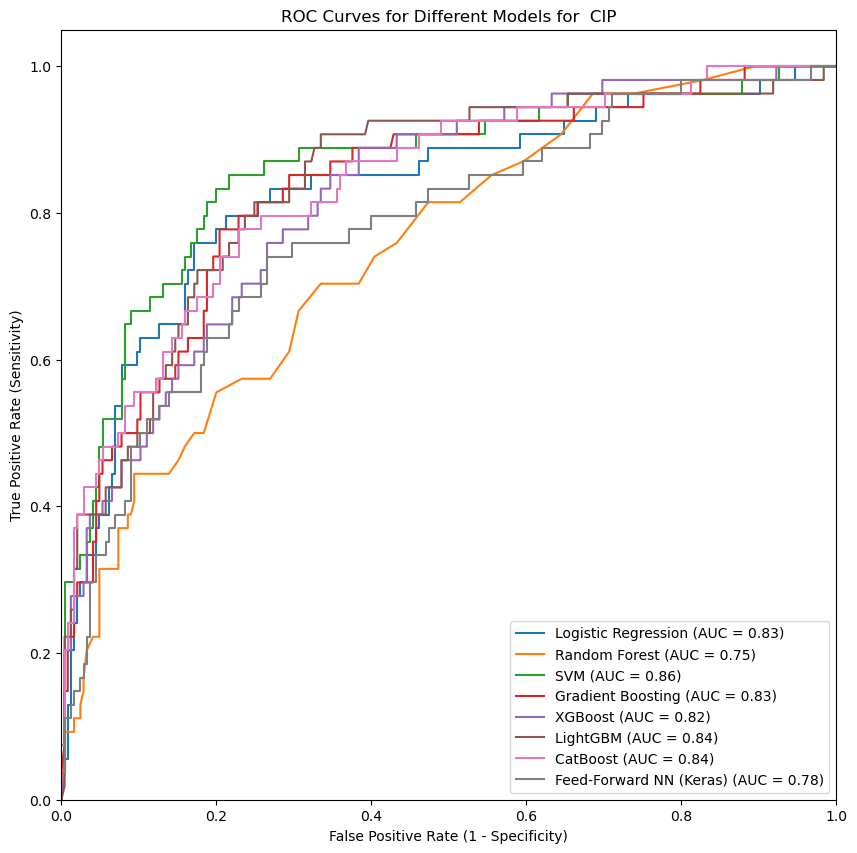

In [40]:
plot_roc_curves(X_test, y_test, X_train, y_train)


In [41]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def plot_both_roc_curves(classifiers, X_test, y_test, X_train, y_train, X_train_downsampled, y_train_downsampled):
    plt.figure(figsize=(10, 10))

    # Plot ROC curves for original data
    for name, clf in classifiers.items():
        clf.fit(X_train, y_train)  # Refit using original data
        y_pred_proba_test = clf.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba_test)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'Original {name} (AUC = {roc_auc:.2f})')

    # Plot ROC curves for downsampled data
    for name, clf in classifiers.items():
        clf.fit(X_train_downsampled, y_train_downsampled)  # Refit using downsampled data
        y_pred_proba_test = clf.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba_test)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, linestyle='--', label=f'Downsampled {name} (AUC = {roc_auc:.2f})')

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.title('ROC Curves for Different Models for Original and Downsampled CIP Datasets')
    plt.legend(loc='lower right')
    plt.show()



/Users/mikensubuga/opt/miniconda3/envs/mlamr39/lib/python3.9/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/mikensubuga/opt/miniconda3/envs/mlamr39/lib/python3.9/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/Users/mikensubuga/opt/miniconda3/envs/mlamr39/lib/python3.9/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/Users/mikensubuga/opt/miniconda3/envs/mlamr39/lib/python3.9/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. U

[LightGBM] [Info] Number of positive: 212, number of negative: 983
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.321249 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 21472
[LightGBM] [Info] Number of data points in the train set: 1195, number of used features: 10174
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.177406 -> initscore=-1.534023
[LightGBM] [Info] Start training from score -1.534023
10/10 [==============================] - 0s 881us/step


/Users/mikensubuga/opt/miniconda3/envs/mlamr39/lib/python3.9/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/mikensubuga/opt/miniconda3/envs/mlamr39/lib/python3.9/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/Users/mikensubuga/opt/miniconda3/envs/mlamr39/lib/python3.9/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/Users/mikensubuga/opt/miniconda3/envs/mlamr39/lib/python3.9/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. U

[LightGBM] [Info] Number of positive: 212, number of negative: 212
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.609006 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 21231
[LightGBM] [Info] Number of data points in the train set: 424, number of used features: 10174
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

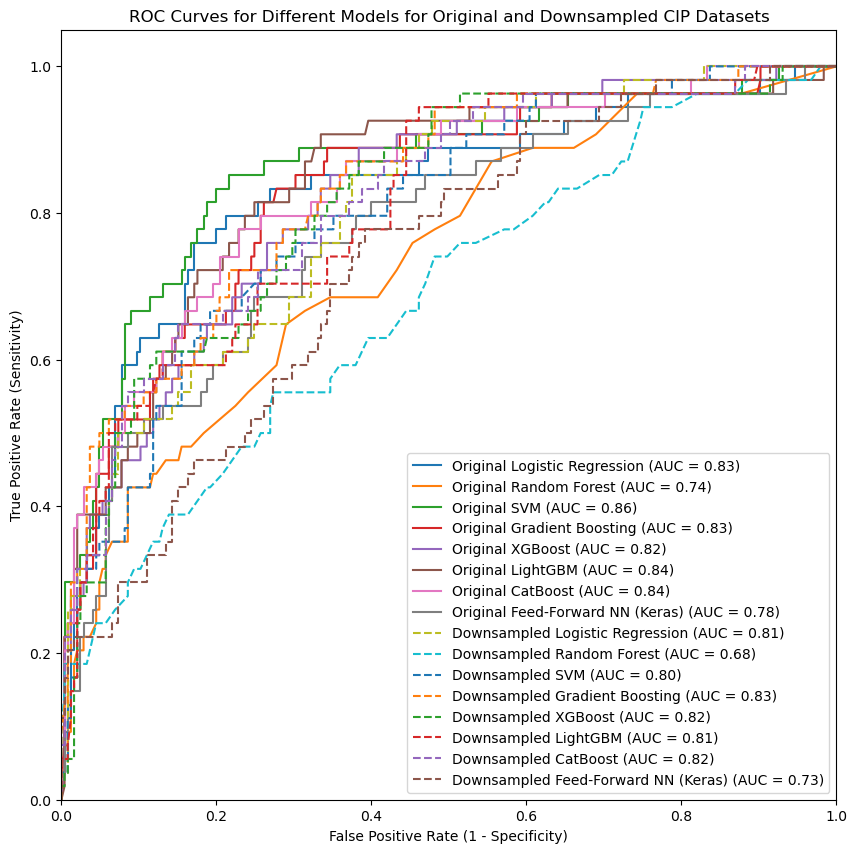

In [42]:
plot_both_roc_curves(classifiers, X_test, y_test, X_train, y_train, X_train_downsampled, y_train_downsampled)


In [ ]:
"""""
#Perform k-fold cross-validation to obtain AUC scores for each model:
from sklearn.model_selection import cross_val_score

def cross_val_auc(classifiers, X, y, cv=5):
    auc_scores = {}
    
    for name, clf in classifiers.items():
        scores = cross_val_score(clf, X, y, cv=cv, scoring='roc_auc')
        auc_scores[name] = scores
        
    return auc_scores

auc_scores = cross_val_auc(classifiers, X, y)
"""""


In [43]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score


def cross_val_auc(classifiers, X, y, cv=5):
    auc_scores = {}
    auc_summary = {}

    for name, clf in classifiers.items():
        if name == 'Feed-Forward NN (Keras)':
            # Manually implement cross-validation for KerasClassifier
            kf = StratifiedKFold(n_splits=cv, shuffle=True, random_state=42)
            scores = []
            for train_index, test_index in kf.split(X, y):
                X_train_keras, X_test_keras = X.iloc[train_index], X.iloc[test_index]
                y_train_keras, y_test_keras = y.iloc[train_index], y.iloc[test_index]
                clf.fit(X_train_keras, y_train_keras)
                y_pred_proba = clf.predict_proba(X_test_keras)[:, 1]
                score = roc_auc_score(y_test_keras, y_pred_proba)
                scores.append(score)
        else:
            # Use standard cross_val_score for other classifiers
            scores = cross_val_score(clf, X, y, cv=cv, scoring='roc_auc', error_score='raise')

        auc_scores[name] = scores
        mean_score = np.nanmean(scores)
        std_score = np.nanstd(scores)
        confidence_interval = (mean_score - 1.96 * (std_score / np.sqrt(cv)), 
                               mean_score + 1.96 * (std_score / np.sqrt(cv)))

        auc_summary[name] = {
            'AUC Mean': mean_score,
            'AUC Std Dev': std_score,
            'AUC 95% CI Lower': confidence_interval[0],
            'AUC 95% CI Upper': confidence_interval[1]
        }

    return auc_scores, auc_summary


In [46]:
auc_scores_original, auc_summary_original = cross_val_auc(classifiers, X, y)
auc_summary_df_original = pd.DataFrame(auc_summary_original).T



/Users/mikensubuga/opt/miniconda3/envs/mlamr39/lib/python3.9/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/mikensubuga/opt/miniconda3/envs/mlamr39/lib/python3.9/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/Users/mikensubuga/opt/miniconda3/envs/mlamr39/lib/python3.9/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/Users/mikensubuga/opt/miniconda3/envs/mlamr39/lib/python3.9/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. U

[LightGBM] [Info] Number of positive: 213, number of negative: 982
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.317177 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 21463
[LightGBM] [Info] Number of data points in the train set: 1195, number of used features: 10174
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.178243 -> initscore=-1.528299
[LightGBM] [Info] Start training from score -1.528299
[LightGBM] [Info] Number of positive: 213, number of negative: 982
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.259998 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 21483
[LightGBM] [Info] Number of data points in the train set: 1195, number of used features: 10174
[LightGBM] [Info] [b

In [47]:
print("AUC Summary for Original Dataset:")
print(auc_summary_df_original)

AUC Summary for Original Dataset:
                         AUC Mean  AUC Std Dev  AUC 95% CI Lower  \
Logistic Regression      0.767228     0.043974          0.728683   
Random Forest            0.585093     0.092521          0.503994   
SVM                      0.821865     0.040025          0.786782   
Gradient Boosting        0.820690     0.034808          0.790180   
XGBoost                  0.790647     0.035387          0.759629   
LightGBM                 0.807266     0.034726          0.776828   
CatBoost                 0.804740     0.040187          0.769515   
Feed-Forward NN (Keras)  0.825051     0.042646          0.787670   

                         AUC 95% CI Upper  
Logistic Regression              0.805773  
Random Forest                    0.666191  
SVM                              0.856948  
Gradient Boosting                0.851201  
XGBoost                          0.821665  
LightGBM                         0.837704  
CatBoost                         0.839966  
F

In [59]:
auc_summary_df_original.to_csv('AUC Summary for Original Dataset.csv')

In [48]:
auc_scores_downsampled, auc_summary_downsampled = cross_val_auc(classifiers, X_train_downsampled, y_train_downsampled)
auc_summary_df_downsampled = pd.DataFrame(auc_summary_downsampled).T



/Users/mikensubuga/opt/miniconda3/envs/mlamr39/lib/python3.9/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/mikensubuga/opt/miniconda3/envs/mlamr39/lib/python3.9/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/Users/mikensubuga/opt/miniconda3/envs/mlamr39/lib/python3.9/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/Users/mikensubuga/opt/miniconda3/envs/mlamr39/lib/python3.9/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. U

[LightGBM] [Info] Number of positive: 170, number of negative: 169
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.238003 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 21189
[LightGBM] [Info] Number of data points in the train set: 339, number of used features: 10170
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501475 -> initscore=0.005900
[LightGBM] [Info] Start training from score 0.005900
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

In [49]:
print("AUC Summary for Downsampled Dataset:")
print(auc_summary_df_downsampled)

AUC Summary for Downsampled Dataset:
                         AUC Mean  AUC Std Dev  AUC 95% CI Lower  \
Logistic Regression      0.803254     0.029463          0.777429   
Random Forest            0.647489     0.019172          0.630683   
SVM                      0.776995     0.020167          0.759317   
Gradient Boosting        0.840998     0.039790          0.806121   
XGBoost                  0.812042     0.038116          0.778632   
LightGBM                 0.804390     0.039490          0.769776   
CatBoost                 0.806457     0.035968          0.774930   
Feed-Forward NN (Keras)  0.733652     0.013741          0.721608   

                         AUC 95% CI Upper  
Logistic Regression              0.829079  
Random Forest                    0.664294  
SVM                              0.794672  
Gradient Boosting                0.875876  
XGBoost                          0.845452  
LightGBM                         0.839005  
CatBoost                         0.837985 

In [62]:
auc_summary_df_downsampled.to_csv('AUC Summary for Downsampled CIP Dataset.csv')

In [50]:
import matplotlib.pyplot as plt

def plot_auc_with_confidence_intervals(auc_summary):
    models = list(auc_summary.keys())
    mean_scores = [auc_summary[model]['AUC Mean'] for model in models]
    lower_bounds = [auc_summary[model]['AUC Mean'] - auc_summary[model]['AUC 95% CI Lower'] for model in models]
    upper_bounds = [auc_summary[model]['AUC 95% CI Upper'] - auc_summary[model]['AUC Mean'] for model in models]

    # Error bars represent the range from lower to upper confidence interval
    error_bars = [lower_bounds, upper_bounds]

    plt.figure(figsize=(12, 6))
    plt.bar(models, mean_scores, yerr=error_bars, capsize=5, color='skyblue')
    plt.xlabel('Models')
    plt.ylabel('AUC Score')
    plt.title('AUC Scores with 95% Confidence Intervals for Each Model')
    plt.xticks(rotation=45)
    plt.show()

# Usage Example
# Assuming auc_summary is defined


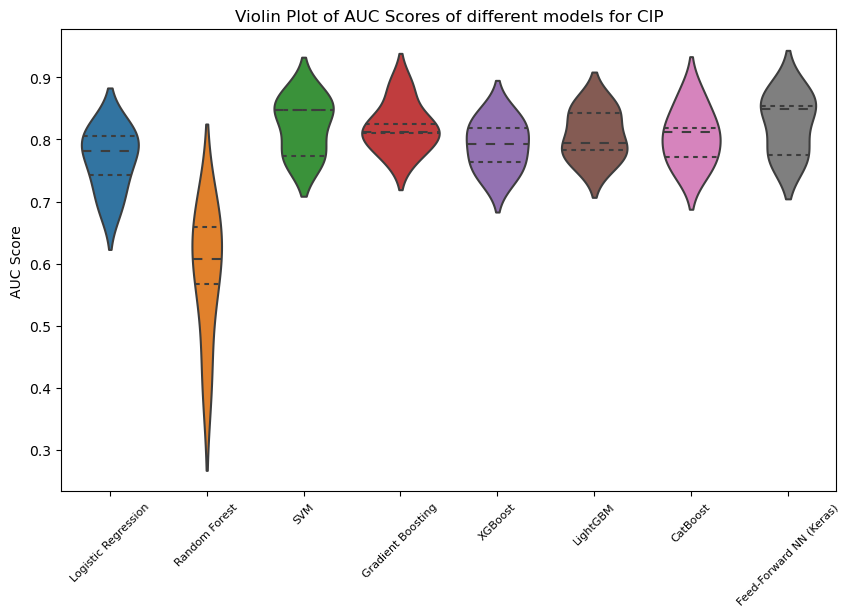

In [51]:
import numpy as np

def plot_auc_boxplot_violinplot(auc_scores):
    model_names = list(auc_scores.keys())
    scores = list(auc_scores.values())
    
    fig, axes = plt.subplots(figsize=(10, 6))
    
    # Violin plot
    sns.violinplot(data=scores, ax=axes, inner='quartile')
    axes.set_title('Violin Plot of AUC Scores of different models for CIP')
    axes.set_xticklabels(model_names, fontsize=8, rotation=45) # Set font size to 10
    axes.set_xticklabels(model_names)
    axes.set_ylabel('AUC Score')
    
    plt.show()

plot_auc_boxplot_violinplot(auc_scores_original)

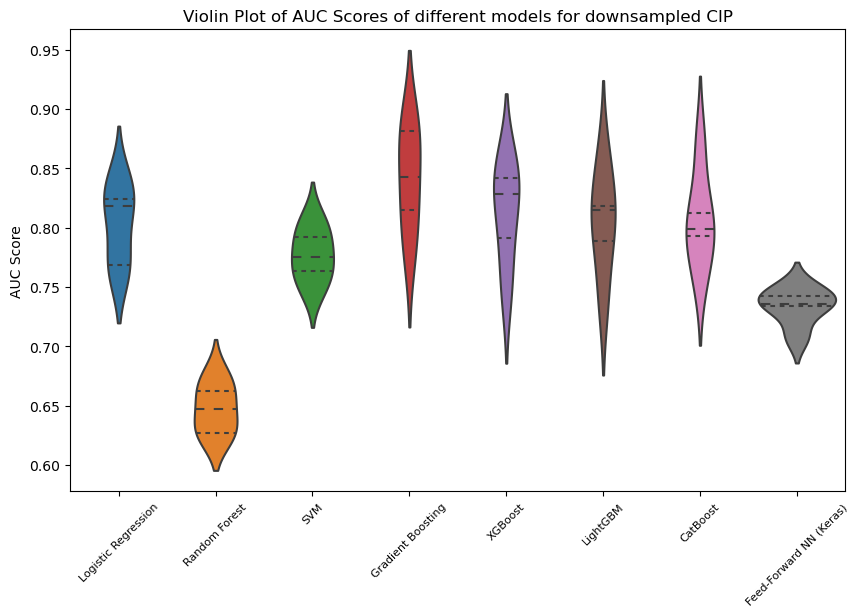

In [52]:
import numpy as np

def plot_auc_boxplot_violinplot(auc_scores):
    model_names = list(auc_scores.keys())
    scores = list(auc_scores.values())
    
    fig, axes = plt.subplots(figsize=(10, 6))
    
    # Violin plot
    sns.violinplot(data=scores, ax=axes, inner='quartile')
    axes.set_title('Violin Plot of AUC Scores of different models for downsampled CIP')
    axes.set_xticklabels(model_names, fontsize=8, rotation=45) # Set font size to 10
    axes.set_xticklabels(model_names)
    axes.set_ylabel('AUC Score')
    
    plt.show()

plot_auc_boxplot_violinplot(auc_scores_downsampled)

In [65]:
import pandas as pd
from statsmodels.stats.multicomp import pairwise_tukeyhsd

def auc_multiple_comparison_test_csv(auc_scores, output_file='tukey_results_CIP_2023.csv'):
    model_names = list(auc_scores.keys())
    scores = list(auc_scores.values())
    
    # Flatten the scores into a single list
    scores_flat = [score for model_scores in scores for score in model_scores]
    
    # Create a list of model names repeated for each score
    model_names_flat = [[model_name] * len(scores[i]) for i, model_name in enumerate(model_names)]
    model_names_flat = [model_name for model_names in model_names_flat for model_name in model_names]
    
    # Perform multiple comparison test
    tukey_results = pairwise_tukeyhsd(scores_flat, model_names_flat)
    print(tukey_results)
    
    # Convert Tukey HSD results to a pandas DataFrame
    tukey_results_df = pd.DataFrame(tukey_results._results_table.data[1:], columns=tukey_results._results_table.data[0])
    
    # Save the DataFrame to a CSV file
    tukey_results_df.to_csv(output_file, index=False)

auc_multiple_comparison_test_csv(auc_scores_original)



                 Multiple Comparison of Means - Tukey HSD, FWER=0.05                  
         group1                  group2         meandiff p-adj   lower   upper  reject
--------------------------------------------------------------------------------------
               CatBoost Feed-Forward NN (Keras)   0.0244 0.9969 -0.0912    0.14  False
               CatBoost       Gradient Boosting   0.0115    1.0 -0.1041  0.1271  False
               CatBoost                LightGBM   0.0025    1.0 -0.1131  0.1181  False
               CatBoost     Logistic Regression  -0.0375 0.9622 -0.1531  0.0781  False
               CatBoost           Random Forest  -0.2301    0.0 -0.3457 -0.1145   True
               CatBoost                     SVM   0.0171 0.9997 -0.0985  0.1327  False
               CatBoost                 XGBoost  -0.0141 0.9999 -0.1297  0.1015  False
Feed-Forward NN (Keras)       Gradient Boosting  -0.0129    1.0 -0.1284  0.1027  False
Feed-Forward NN (Keras)                Ligh

In [292]:
"""""
def logistic_regression_feature_importance(lr_model, feature_names):
    importance = np.abs(lr_model.coef_[0])
    feature_importance = sorted(zip(feature_names, importance), key=lambda x: x[1], reverse=True)
    return feature_importance[:10]
"""""


In [293]:
"""""

def random_forest_feature_importance(rf_model, feature_names):
    importance = rf_model.feature_importances_
    feature_importance = sorted(zip(feature_names, importance), key=lambda x: x[1], reverse=True)
    return feature_importance[:10]
"""""


In [321]:
"""""

from sklearn.feature_selection import SelectKBest, chi2

def svm_feature_importance(svm_model, feature_names, X_train, y_train):
    if svm_model.kernel == 'linear':
        importance = np.abs(svm_model.coef_[0])
        feature_importance = sorted(zip(feature_names, importance), key=lambda x: x[1], reverse=True)
    else:
        selector = SelectKBest(chi2, k=15)
        selector.fit(X_train, y_train)
        feature_importance = sorted(zip(feature_names, selector.scores_), key=lambda x: x[1], reverse=True)
    
    return feature_importance[:10]
"""""


In [295]:
"""""

def gradient_boosting_feature_importance(gb_model, feature_names):
    importance = gb_model.feature_importances_
    feature_importance = sorted(zip(feature_names, importance), key=lambda x: x[1], reverse=True)
    return feature_importance[:10]

"""""



In [306]:
"""""

def xgboost_feature_importance(xgb_model, feature_names):
    importance = xgb_model.feature_importances_
    feature_importance = sorted(zip(feature_names, importance), key=lambda x: x[1], reverse=True)
    return feature_importance[:10]

def lightgbm_feature_importance(lgb_model, feature_names):
    importance = lgb_model.feature_importances_
    feature_importance = sorted(zip(feature_names, importance), key=lambda x: x[1], reverse=True)
    return feature_importance[:10]

def catboost_feature_importance(cb_model, feature_names):
    importance = cb_model.feature_importances_
    feature_importance = sorted(zip(feature_names, importance), key=lambda x: x[1], reverse=True)
    return feature_importance[:10]

def keras_nn_feature_importance(keras_model, feature_names):
    weights = np.abs(keras_model.model.layers[0].get_weights()[0]).mean(axis=1)
    feature_importance = sorted(zip(feature_names, weights), key=lambda x: x[1], reverse=True)
    return feature_importance[:10]

"""""



In [319]:
"""""

feature_names = X.columns
lr_importance = logistic_regression_feature_importance(classifiers['Logistic Regression'], feature_names)
rf_importance = random_forest_feature_importance(classifiers['Random Forest'], feature_names)
gb_importance = gradient_boosting_feature_importance(classifiers['Gradient Boosting'], feature_names)
xgb_importance = xgboost_feature_importance(classifiers['XGBoost'], feature_names)
lgb_importance = lightgbm_feature_importance(classifiers['LightGBM'], feature_names)
cb_importance = catboost_feature_importance(classifiers['CatBoost'], feature_names)
keras_importance = keras_nn_feature_importance(classifiers['Feed-Forward NN (Keras)'], feature_names)
svm_importance = svm_feature_importance(classifiers['SVM'], feature_names, X_train, y_train)


#keras_importance = keras_nn_feature_importance(classifiers['Keras Neural Network'], feature_names)

print("Top 10 features for Logistic Regression:\n", lr_importance)
print("\nTop 10 features for Random Forest:\n", rf_importance)
print("\nTop 10 features for Gradient Boosting:\n", gb_importance)
print("\nTop 10 features for XGBoost:\n", xgb_importance)
print("\nTop 10 features for LightGBM:\n", lgb_importance)
print("\nTop 10 features for CatBoost:\n", cb_importance)
print("\nTop 10 features for Keras Neural Network:\n", keras_importance)
print("\nTop 10 features for SVM:\n", svm_importance)


#print("\nTop 10 features for Keras Neural Network:\n", keras_importance)

"""""



Top 10 features for Logistic Regression:
 [('3589009', 0.47425056786296166), ('4040529', 0.38734561539988405), ('1473047', 0.344613871080861), ('3088751', 0.3202002335302843), ('3117412', 0.3088574087767497), ('3118273', 0.3062601526168967), ('1324783', 0.2964221411177908), ('1720453', 0.27856710910099575), ('4446973', 0.27669705631159247), ('2778469', 0.27545077412833346)]

Top 10 features for Random Forest:
 [('1008149', 0.004874510266423349), ('3284134', 0.004591763210551918), ('4240504', 0.0037195325025787505), ('1263246', 0.003581270714529625), ('4453756', 0.003289424397902458), ('2824686', 0.003261022625293519), ('4374394', 0.003043280606739761), ('4286100', 0.0029690386022800485), ('3614716', 0.0027871034689667495), ('1466504', 0.0027497162078839858)]

Top 10 features for Gradient Boosting:
 [('2189699', 0.05061694088154919), ('3230190', 0.046961310635235), ('1008149', 0.04507644806108485), ('3284134', 0.04347997584811489), ('1263246', 0.029621409527813607), ('4240504', 0.028179

In [ ]:
"""""


def plot_feature_importances(importances, model_name):
    features, scores = zip(*importances)
    
    plt.figure(figsize=(10, 6))
    y_pos = np.arange(len(features))
    
    plt.barh(y_pos, scores, align='center', alpha=0.5)
    plt.yticks(y_pos, features)
    plt.xlabel('Importance Score')
    plt.title(f'Top 10 Features for {model_name}')
    
    plt.gca().invert_yaxis()  # To show features from top to bottom
    plt.show()

plot_feature_importances(lr_importance, 'Logistic Regression')
plot_feature_importances(rf_importance, 'Random Forest')
plot_feature_importances(gb_importance, 'Gradient Boosting')
plot_feature_importances(xgb_importance, 'XGBoost')
plot_feature_importances(lgb_importance, 'LightGBM')
plot_feature_importances(cb_importance, 'CatBoost')
plot_feature_importances(keras_importance, 'Feed Foward Neural Network')
plot_feature_importances(svm_importance, 'SVM')

"""""



Omit Normalisation

In [ ]:
"""""

def normalize_importance_scores(importances):
    features, scores = zip(*importances)
    max_score = max(scores)
    normalized_scores = [score / max_score for score in scores]
    return list(zip(features, normalized_scores))

lr_normalized = normalize_importance_scores(lr_importance)
rf_normalized = normalize_importance_scores(rf_importance)
gb_normalized = normalize_importance_scores(gb_importance)

def plot_grouped_feature_importances(importances_list, model_names):
    n_models = len(importances_list)
    n_features = len(importances_list[0])
    
    bar_width = 0.2
    index = np.arange(n_features)
    
    plt.figure(figsize=(12, 8))
    
    for i, (importances, model_name) in enumerate(zip(importances_list, model_names)):
        _, scores = zip(*importances)
        plt.bar(index + i * bar_width, scores, bar_width, label=model_name)
    
    plt.xticks(index + bar_width * (n_models - 1) / 2, [imp[0] for imp in importances_list[0]])
    plt.xlabel('Features')
    plt.ylabel('Normalized Importance Score')
    plt.title('Top 10 Features for Each Model')
    plt.legend()
    plt.show()

plot_grouped_feature_importances(
    [lr_normalized, rf_normalized, gb_normalized],
    ['Logistic Regression', 'Random Forest', 'Gradient Boosting']
)

"""""



grouped bar chart for all features

In [329]:
"""""

import pandas as pd

def create_feature_importance_table(importances_list, model_names):
    columns = ['Feature', 'Importance'] * len(model_names)
    table_data = []
    
    for importances in importances_list:
        features, importance_values = zip(*importances)
        table_data.append(features)
        table_data.append(importance_values)
    
    df = pd.DataFrame(table_data).T
    df.columns = columns
    
    return df

importances_list = [lr_importance, rf_importance, gb_importance, xgb_importance, lgb_importance, cb_importance, keras_importance, svm_importance]
model_names = ["Logistic Regression", "Random Forest", "Gradient Boosting", "XGBoost", "LightGBM", "CatBoost", "Feed-Forward NN (Keras)", "SVM"]

feature_importance_df = create_feature_importance_table(importances_list, model_names)
feature_importance_df
"""""


,Feature,Importance,Feature,Importance,Feature,Importance,Feature,Importance,Feature,Importance,Feature,Importance,Feature,Importance,Feature,Importance
0,3589009,0.474251,1008149,0.004875,2189699,0.050617,4374394,0.037476,4040529,27,4428325,2.385133,4614839,0.02598,1008149,151.242976
1,4040529,0.387346,3284134,0.004592,3230190,0.046961,1008149,0.026697,4437351,27,3230190,1.496004,4428325,0.024544,3009381,131.125127
2,1473047,0.344614,4240504,0.00372,1008149,0.045076,3284134,0.024254,2160560,26,2189699,1.382882,4615406,0.024264,4172848,119.694812
3,3088751,0.3202,1263246,0.003581,3284134,0.04348,3615876,0.019904,3680451,25,1008149,1.261349,4437351,0.024074,4445374,108.659889
4,3117412,0.308857,4453756,0.003289,1263246,0.029621,2189699,0.018403,3118273,21,3284134,1.08298,4458693,0.023417,3418178,107.095884
5,3118273,0.30626,2824686,0.003261,4240504,0.02818,1239691,0.014315,4428325,21,4615406,1.078714,4452347,0.023197,2791632,106.185036
6,1324783,0.296422,4374394,0.003043,4374394,0.02772,3230190,0.011812,4481654,21,3584376,0.989736,3200153,0.022376,1264526,104.354141
7,1720453,0.278567,4286100,0.002969,3373941,0.026888,2792739,0.011678,2480806,20,4445374,0.970957,4443644,0.0222,4172776,103.49306
8,4446973,0.276697,3614716,0.002787,3615876,0.022445,3021822,0.01131,3589009,18,3681794,0.960721,4434509,0.022026,4218643,102.632005
9,2778469,0.275451,1466504,0.00275,3681794,0.022269,3373941,0.011244,2035257,16,4269331,0.95793,3584376,0.021608,3300216,100.931841


In [53]:
def calculate_metrics(y_true, y_pred_proba):
    if isinstance(y_pred_proba, list) and all([v == 0 for v in y_pred_proba]):
        # If y_pred_proba is a list of zeros, handle it as a special case
        # For example, predict the most frequent class or a default class
        y_pred = np.zeros(len(y_true), dtype=int)  # Example: predicting the most frequent class (0)
    else:
        # Convert probabilities to class labels (0 or 1) based on a threshold (e.g., 0.5)
        y_pred = (y_pred_proba > 0.5).astype(int)

    return {
        'accuracy': accuracy_score(y_true, y_pred),
        'precision': precision_score(y_true, y_pred),
        'recall': recall_score(y_true, y_pred),
        'f1_score': f1_score(y_true, y_pred),
        'auc_roc': roc_auc_score(y_true, y_pred_proba) if not isinstance(y_pred_proba, list) else 0
    }




In [54]:
Africa_metrics_original = {}
for model_name, model in classifiers_trained_on_original.items():
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(Africa_X)[:, 1]
    elif hasattr(model, "decision_function"):  # For models like SVM
        y_pred_proba = model.decision_function(Africa_X)
    else:
        y_pred_proba = [0] * len(Africa_y)  # Placeholder if model can't produce probabilities

    Africa_metrics_original[model_name] = calculate_metrics(Africa_y, y_pred_proba)


/Users/mikensubuga/opt/miniconda3/envs/mlamr39/lib/python3.9/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/mikensubuga/opt/miniconda3/envs/mlamr39/lib/python3.9/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/Users/mikensubuga/opt/miniconda3/envs/mlamr39/lib/python3.9/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/Users/mikensubuga/opt/miniconda3/envs/mlamr39/lib/python3.9/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. U

In [55]:
Africa_metrics_downsample = {}
for model_name, model in classifiers_trained_on_downsampled.items():
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(Africa_X)[:, 1]
    elif hasattr(model, "decision_function"):  # For models like SVM
        y_pred_proba = model.decision_function(Africa_X)
    else:
        y_pred_proba = [0] * len(Africa_y)  # Placeholder if model can't produce probabilities

    Africa_metrics_downsample[model_name] = calculate_metrics(Africa_y, y_pred_proba)


/Users/mikensubuga/opt/miniconda3/envs/mlamr39/lib/python3.9/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/mikensubuga/opt/miniconda3/envs/mlamr39/lib/python3.9/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/Users/mikensubuga/opt/miniconda3/envs/mlamr39/lib/python3.9/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/Users/mikensubuga/opt/miniconda3/envs/mlamr39/lib/python3.9/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. U

In [ ]:
"""""
def evaluate_on_uganda_data(classifiers, Uganda_X, Uganda_y):
    Uganda_metrics = {}
    for model_name, model in classifiers.items():
        if hasattr(model, "predict_proba"):
            y_pred_proba = model.predict_proba(Uganda_X)[:, 1]
        elif hasattr(model, "decision_function"):  # For models like SVM
            y_pred_proba = model.decision_function(Uganda_X)
        else:
            y_pred_proba = [0] * len(Uganda_y)  # Placeholder if model can't produce probabilities

        Uganda_metrics[model_name] = calculate_metrics(Uganda_y, y_pred_proba)
    return Uganda_metrics

# Make sure the classifiers are trained and stored correctly
classifiers_trained_on_original = train_models(classifiers, X_train, y_train)
classifiers_trained_on_downsampled = train_models(classifiers, X_train_downsampled, y_train_downsampled)

# Evaluate on Ugandan data
Uganda_metrics_original = evaluate_on_uganda_data(classifiers_trained_on_original, Uganda_X, Uganda_y)
Uganda_metrics_downsampled = evaluate_on_uganda_data(classifiers_trained_on_downsampled, Uganda_X, Uganda_y)
"""""


In [56]:
Africa_df_original = pd.DataFrame(Africa_metrics_original).transpose().round(2)
print(Africa_df_original)

                         accuracy  precision  recall  f1_score  auc_roc
Logistic Regression          0.55       0.59    0.16      0.25     0.48
Random Forest                0.50       0.47    0.57      0.52     0.53
SVM                          0.51       0.38    0.07      0.12     0.44
Gradient Boosting            0.57       0.59    0.27      0.37     0.54
XGBoost                      0.57       0.67    0.17      0.27     0.56
LightGBM                     0.55       0.62    0.12      0.20     0.51
CatBoost                     0.56       0.61    0.17      0.27     0.58
Feed-Forward NN (Keras)      0.53       0.00    0.00      0.00     0.00


In [70]:
Africa_df_original.to_csv("CIP Africa performance scores.csv")

In [57]:
Africa_df_downsampled = pd.DataFrame(Africa_metrics_downsample).transpose().round(2)
print(Africa_df_downsampled)

                         accuracy  precision  recall  f1_score  auc_roc
Logistic Regression          0.55       0.59    0.16      0.25     0.48
Random Forest                0.50       0.47    0.57      0.52     0.53
SVM                          0.51       0.38    0.07      0.12     0.44
Gradient Boosting            0.57       0.59    0.27      0.37     0.54
XGBoost                      0.57       0.67    0.17      0.27     0.56
LightGBM                     0.55       0.62    0.12      0.20     0.51
CatBoost                     0.56       0.61    0.17      0.27     0.58
Feed-Forward NN (Keras)      0.53       0.00    0.00      0.00     0.00


In [82]:
results_test = evaluate_models(classifiers_trained_on_downsampled, Africa_X, Africa_y)
results_test_df = pd.DataFrame(results_test).transpose().round(2)
results_test_df


/Users/mikensubuga/opt/miniconda3/envs/mlamr39/lib/python3.9/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/mikensubuga/opt/miniconda3/envs/mlamr39/lib/python3.9/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/Users/mikensubuga/opt/miniconda3/envs/mlamr39/lib/python3.9/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/Users/mikensubuga/opt/miniconda3/envs/mlamr39/lib/python3.9/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. U

6/6 [==============================] - 0s 1ms/step


,accuracy,precision,recall,f1_score,auc_roc
Logistic Regression,0.55,0.59,0.16,0.25,0.48
Random Forest,0.50,0.48,0.68,0.56,0.53
SVM,0.51,0.38,0.07,0.12,0.44
Gradient Boosting,0.52,0.49,0.32,0.39,0.49
XGBoost,0.57,0.67,0.17,0.27,0.56
LightGBM,0.55,0.62,0.12,0.20,0.51
CatBoost,0.56,0.61,0.17,0.27,0.58
Feed-Forward NN (Keras),0.55,0.53,0.34,0.41,0.48


In [ ]:
"""""
from sklearn.metrics import roc_auc_score

# Initialize a dictionary to store evaluation metrics for each model
Uganda_metrics = {}

# Define a function to calculate the evaluation metrics
def calculate_metrics(y_true, y_pred, y_pred_proba):
    return {
        'accuracy': accuracy_score(y_true, y_pred),
        'precision': precision_score(y_true, y_pred),
        'recall': recall_score(y_true, y_pred),
        'f1_score': f1_score(y_true, y_pred),
        'auc_roc': roc_auc_score(y_true, y_pred_proba)
    }

# Evaluate each model on the independent dataset
for model_name, model in classifiers.items():
    y_pred = model.predict(Uganda_X)
    y_pred_proba = model.predict_proba(Uganda_X)[:, 1]
    Uganda_metrics[model_name] = calculate_metrics(Uganda_y, y_pred, y_pred_proba)

"""""



In [65]:
def plot_roc_curves_original(classifiers, Uganda_X, Uganda_y):
    plt.figure(figsize=(10, 10))
    
    for name, clf in classifiers.items():
 # Use predict for Keras model and predict_proba for others
        if name == 'Feed-Forward NN (Keras)':
            y_pred_proba_uganda = clf.predict(Uganda_X).ravel() # Flatten the array if needed
        else:
            y_pred_proba_uganda = clf.predict_proba(Uganda_X)[:, 1]        
        fpr, tpr, _ = roc_curve(Uganda_y, y_pred_proba_uganda)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'Original {name} (AUC = {roc_auc:.2f})')

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.title('ROC Curves for CIP Models on Africa Dataset')
    plt.legend(loc='lower right')
    plt.show()


In [59]:
def plot_roc_curves_downsampled(classifiers, Uganda_X, Uganda_y):
    plt.figure(figsize=(10, 10))
    
    for name, clf in classifiers.items():
        # Use predict for Keras model and predict_proba for others
        if name == 'Feed-Forward NN (Keras)':
            y_pred_proba_uganda = clf.predict(Uganda_X).ravel() # Flatten the array if needed
        else:
            y_pred_proba_uganda = clf.predict_proba(Uganda_X)[:, 1]

        fpr, tpr, _ = roc_curve(Uganda_y, y_pred_proba_uganda)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'Downsampled {name} (AUC = {roc_auc:.2f})')

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.title('ROC Curves for Downsampled Models on Africa Dataset')
    plt.legend(loc='lower right')
    plt.show()


/Users/mikensubuga/opt/miniconda3/envs/mlamr39/lib/python3.9/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/mikensubuga/opt/miniconda3/envs/mlamr39/lib/python3.9/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/Users/mikensubuga/opt/miniconda3/envs/mlamr39/lib/python3.9/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/Users/mikensubuga/opt/miniconda3/envs/mlamr39/lib/python3.9/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. U

6/6 [==============================] - 0s 962us/step


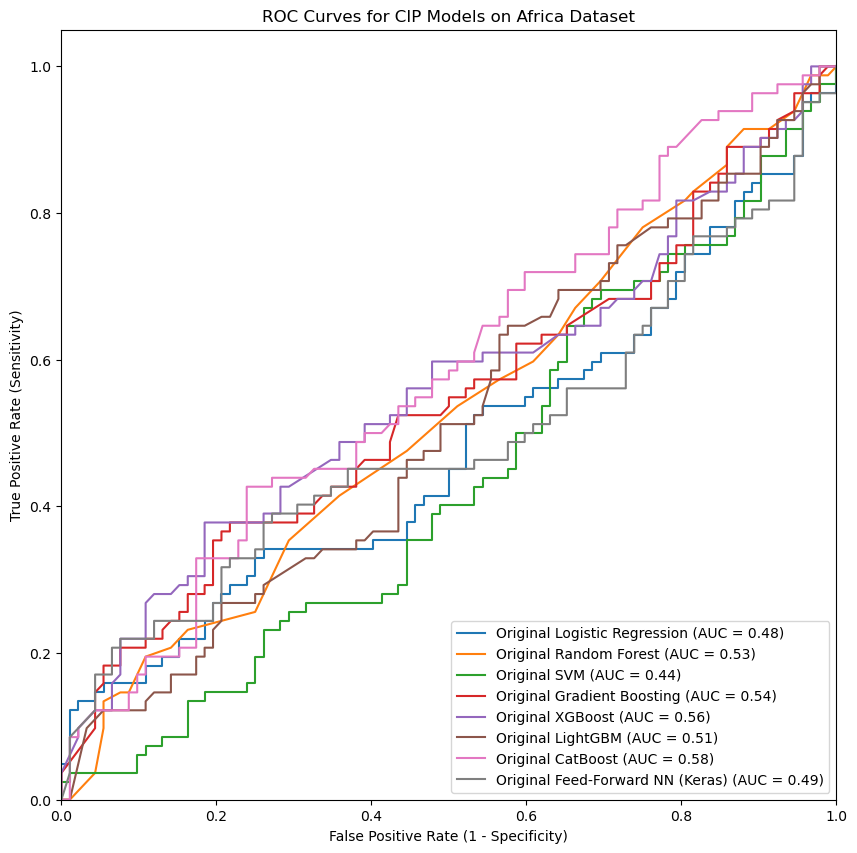

In [66]:
plot_roc_curves_original(classifiers_trained_on_original, Uganda_X, Uganda_y)


/Users/mikensubuga/opt/miniconda3/envs/mlamr39/lib/python3.9/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/mikensubuga/opt/miniconda3/envs/mlamr39/lib/python3.9/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/Users/mikensubuga/opt/miniconda3/envs/mlamr39/lib/python3.9/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/Users/mikensubuga/opt/miniconda3/envs/mlamr39/lib/python3.9/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. U

6/6 [==============================] - 0s 854us/step


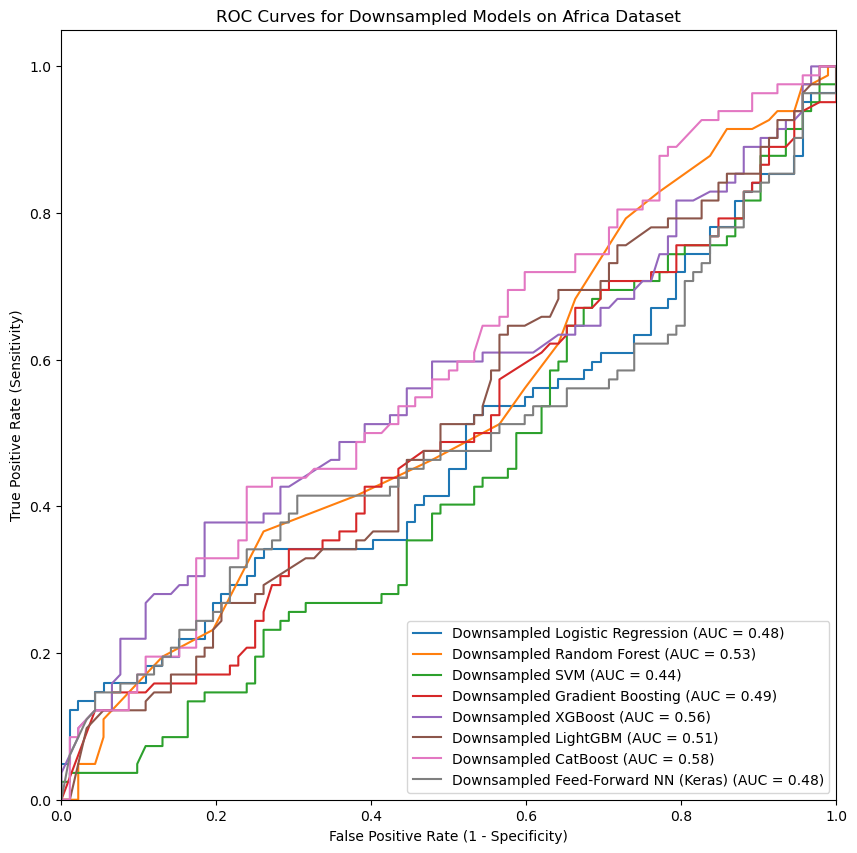

In [76]:
plot_roc_curves_downsampled(classifiers_trained_on_downsampled, Uganda_X, Uganda_y)


/Users/mikensubuga/opt/miniconda3/envs/mlamr39/lib/python3.9/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/mikensubuga/opt/miniconda3/envs/mlamr39/lib/python3.9/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/Users/mikensubuga/opt/miniconda3/envs/mlamr39/lib/python3.9/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/Users/mikensubuga/opt/miniconda3/envs/mlamr39/lib/python3.9/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. U

6/6 [==============================] - 0s 1ms/step


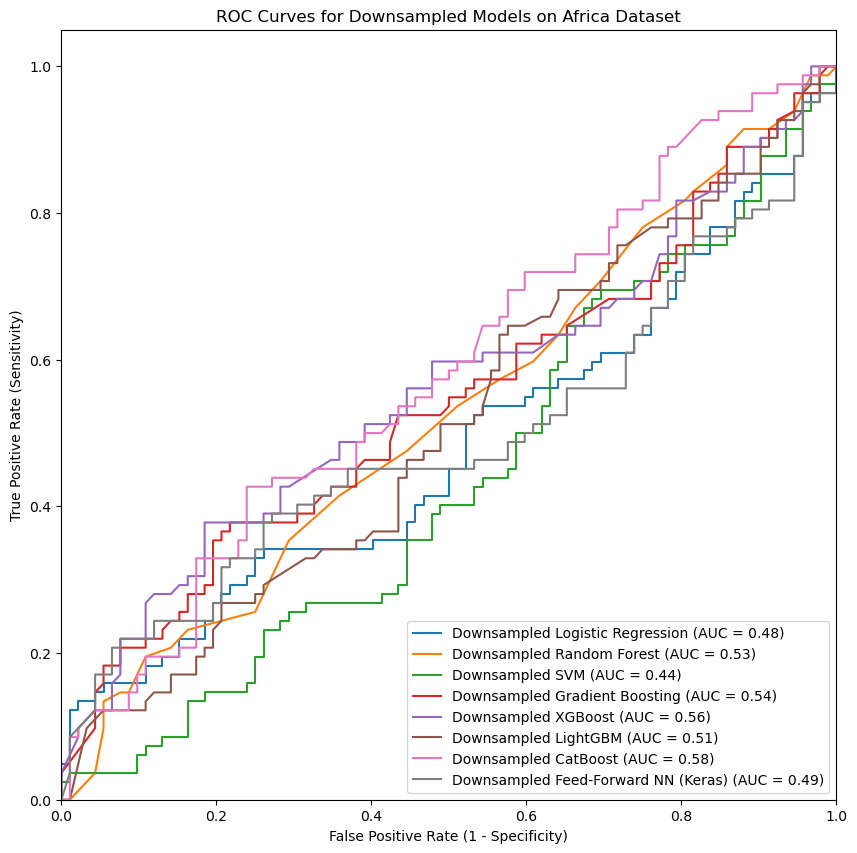

In [61]:
plot_roc_curves_downsampled(classifiers_trained_on_original, Uganda_X, Uganda_y)


In [62]:
auc_scores_africa, auc_summary_africa = cross_val_auc(classifiers, Africa_X, Africa_y)
auc_summary_df_africa = pd.DataFrame(auc_summary_africa).T

/Users/mikensubuga/opt/miniconda3/envs/mlamr39/lib/python3.9/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/mikensubuga/opt/miniconda3/envs/mlamr39/lib/python3.9/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/Users/mikensubuga/opt/miniconda3/envs/mlamr39/lib/python3.9/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/Users/mikensubuga/opt/miniconda3/envs/mlamr39/lib/python3.9/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. U

[LightGBM] [Info] Number of positive: 65, number of negative: 74
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009466 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 21686
[LightGBM] [Info] Number of data points in the train set: 139, number of used features: 9715
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.467626 -> initscore=-0.129678
[LightGBM] [Info] Start training from score -0.129678
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

In [63]:
print("AUC Summary for Africa Dataset:")
print(auc_summary_df_africa)

AUC Summary for Africa Dataset:
                         AUC Mean  AUC Std Dev  AUC 95% CI Lower  \
Logistic Regression      0.690235     0.098413          0.603972   
Random Forest            0.664523     0.092199          0.583707   
SVM                      0.395741     0.074212          0.330691   
Gradient Boosting        0.736067     0.141368          0.612153   
XGBoost                  0.729707     0.130286          0.615506   
LightGBM                 0.720677     0.152753          0.586783   
CatBoost                 0.686898     0.123047          0.579043   
Feed-Forward NN (Keras)  0.618924     0.083606          0.545640   

                         AUC 95% CI Upper  
Logistic Regression              0.776498  
Random Forest                    0.745339  
SVM                              0.460791  
Gradient Boosting                0.859982  
XGBoost                          0.843908  
LightGBM                         0.854572  
CatBoost                         0.794753  
Fee

In [79]:
auc_summary_df_africa.to_csv("CIP AUC Summary for Africa Dataset.csv")

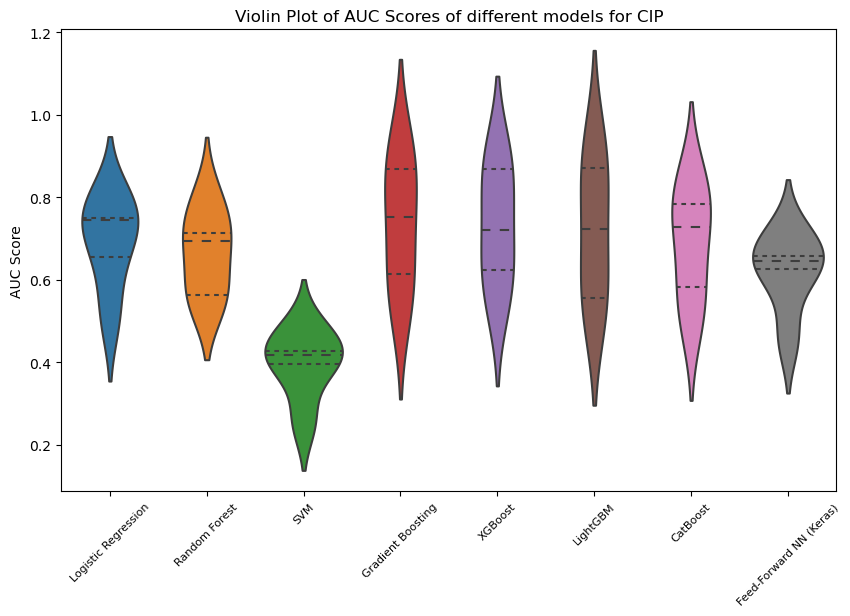

In [64]:
import numpy as np

def plot_auc_boxplot_violinplot(auc_scores):
    model_names = list(auc_scores.keys())
    scores = list(auc_scores.values())
    
    fig, axes = plt.subplots(figsize=(10, 6))
    
    # Violin plot
    sns.violinplot(data=scores, ax=axes, inner='quartile')
    axes.set_title('Violin Plot of AUC Scores of different models for CIP')
    axes.set_xticklabels(model_names, fontsize=8, rotation=45) # Set font size to 10
    axes.set_xticklabels(model_names)
    axes.set_ylabel('AUC Score')
    
    plt.show()

plot_auc_boxplot_violinplot(auc_scores_africa)

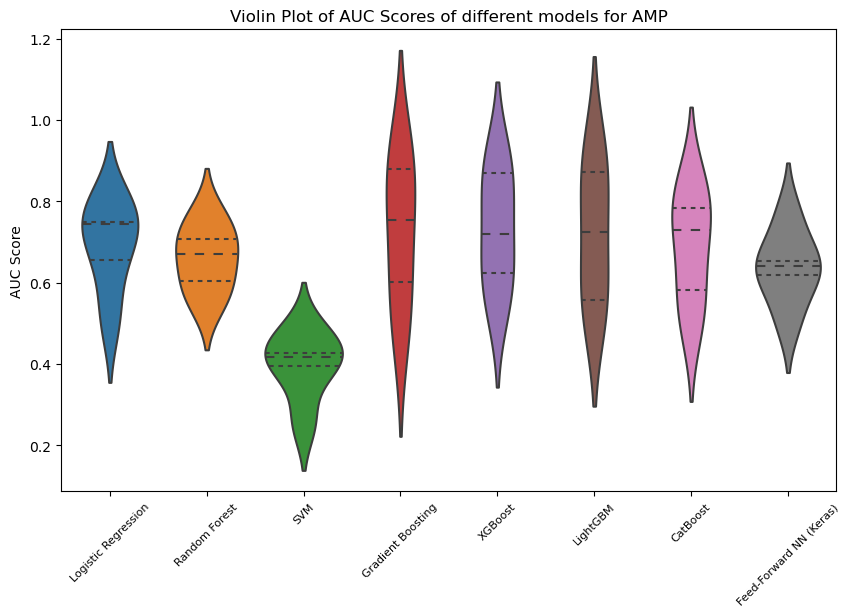

In [80]:
import numpy as np

def plot_auc_boxplot_violinplot(auc_scores):
    model_names = list(auc_scores.keys())
    scores = list(auc_scores.values())
    
    fig, axes = plt.subplots(figsize=(10, 6))
    
    # Violin plot
    sns.violinplot(data=scores, ax=axes, inner='quartile')
    axes.set_title('Violin Plot of AUC Scores of different models for AMP')
    axes.set_xticklabels(model_names, fontsize=8, rotation=45) # Set font size to 10
    axes.set_xticklabels(model_names)
    axes.set_ylabel('AUC Score')
    
    plt.show()

plot_auc_boxplot_violinplot(auc_scores_africa)

In [84]:
rf_tt = evaluate_models(classifiers_trained_on_original, Africa_X, Africa_y)
rf_testing = pd.DataFrame(rf_tt).transpose().round(2)
rf_testing

/Users/mikensubuga/opt/miniconda3/envs/mlamr39/lib/python3.9/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/mikensubuga/opt/miniconda3/envs/mlamr39/lib/python3.9/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/Users/mikensubuga/opt/miniconda3/envs/mlamr39/lib/python3.9/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/Users/mikensubuga/opt/miniconda3/envs/mlamr39/lib/python3.9/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. U

6/6 [==============================] - 0s 974us/step


,accuracy,precision,recall,f1_score,auc_roc
Logistic Regression,0.55,0.59,0.16,0.25,0.48
Random Forest,0.50,0.48,0.68,0.56,0.53
SVM,0.51,0.38,0.07,0.12,0.44
Gradient Boosting,0.52,0.49,0.32,0.39,0.49
XGBoost,0.57,0.67,0.17,0.27,0.56
LightGBM,0.55,0.62,0.12,0.20,0.51
CatBoost,0.56,0.61,0.17,0.27,0.58
Feed-Forward NN (Keras),0.56,0.71,0.12,0.21,0.49


In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

def xgboost_feature_importance(xgb_model, feature_names):
    importance = xgb_model.feature_importances_
    feature_importance = sorted(zip(feature_names, importance), key=lambda x: x[1], reverse=True)
    return feature_importance[:50]

def lightgbm_feature_importance(lgb_model, feature_names):
    importance = lgb_model.feature_importances_
    feature_importance = sorted(zip(feature_names, importance), key=lambda x: x[1], reverse=True)
    return feature_importance[:50]

def catboost_feature_importance(cb_model, feature_names):
    importance = cb_model.feature_importances_
    feature_importance = sorted(zip(feature_names, importance), key=lambda x: x[1], reverse=True)
    return feature_importance[:50]

def keras_nn_feature_importance(keras_model, feature_names):
    weights = np.abs(keras_model.model.layers[0].get_weights()[0]).mean(axis=1)
    feature_importance = sorted(zip(feature_names, weights), key=lambda x: x[1], reverse=True)
    return feature_importance[:50]

def gradient_boosting_feature_importance(gb_model, feature_names):
    importance = gb_model.feature_importances_
    feature_importance = sorted(zip(feature_names, importance), key=lambda x: x[1], reverse=True)
    return feature_importance[:50]

def svm_feature_importance(svm_model, feature_names, X_train, y_train):
    if svm_model.kernel == 'linear':
        importance = np.abs(svm_model.coef_[0])
        feature_importance = sorted(zip(feature_names, importance), key=lambda x: x[1], reverse=True)
    else:
        selector = SelectKBest(chi2, k=15)
        selector.fit(X_train, y_train)
        feature_importance = sorted(zip(feature_names, selector.scores_), key=lambda x: x[1], reverse=True)
    
    return feature_importance[:50]

def random_forest_feature_importance(rf_model, feature_names):
    importance = rf_model.feature_importances_
    feature_importance = sorted(zip(feature_names, importance), key=lambda x: x[1], reverse=True)
    return feature_importance[:50]

def logistic_regression_feature_importance(lr_model, feature_names):
    importance = np.abs(lr_model.coef_[0])
    feature_importance = sorted(zip(feature_names, importance), key=lambda x: x[1], reverse=True)
    return feature_importance[:50]
